In [1]:
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
img = cv2.imread('./Model/Test_Image/Zayn.jpg')
if img is not None:
    print('variable is not None')
    print(img.shape)
else:
    print('variable is None')

variable is not None
(1069, 800, 3)


In [3]:
import os
print(os.path.exists('./Model/Test_Image/Zayn.jpg'))

True


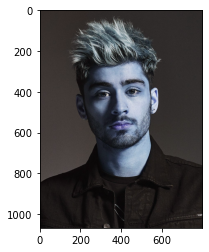

In [4]:
plt.imshow(img)

In [5]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1069, 800)

In [6]:
gray

array([[46, 46, 44, ..., 36, 46, 47],
       [41, 45, 48, ..., 38, 46, 44],
       [42, 45, 48, ..., 40, 44, 38],
       ...,
       [10, 15, 13, ..., 18, 42, 26],
       [ 7, 11, 13, ..., 33, 35, 30],
       [ 6,  8, 12, ..., 44, 23, 42]], dtype=uint8)

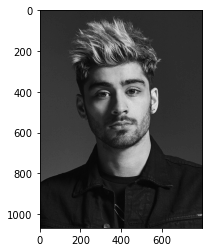

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('C:/Users/USER/Desktop/Machine_learning/Image_Recognition_Model_Project/Model/OpenCV/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('C:/Users/USER/Desktop/Machine_learning/Image_Recognition_Model_Project/Model/OpenCV/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[201, 258, 372, 372]])

In [9]:
# X : X Axis
# Y : Y Axis 
# W : Width
# H : Height
(x,y,w,h) = faces[0]
x,y,w,h

(201, 258, 372, 372)

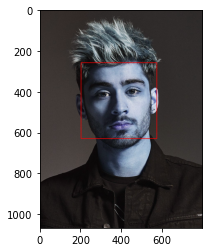

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

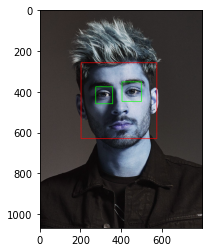

In [11]:


cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

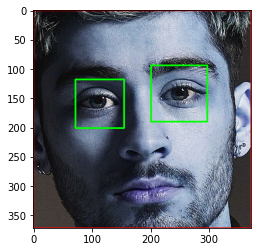

In [12]:
# roi = region of interest 
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

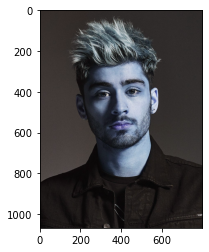

In [14]:
original_image = cv2.imread('./Model/Test_Image/Zayn.jpg')
plt.imshow(original_image)

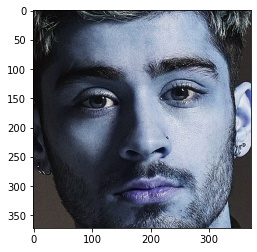

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./Model/Test_Image/Zayn.jpg')
plt.imshow(cropped_image)

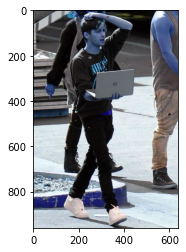

In [16]:
org_image_obstructed = cv2.imread('./Model/Test_Image/Zayn_img2.jpg')
plt.imshow(org_image_obstructed)

In [17]:
# This is not printing any image beacuse eyes of the person is not visible.
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./Model/Test_Image/Zayn_img2.jpg')
cropped_image_no_2_eyes

In [18]:
path_to_data = "./Model/dataset"
path_to_cr_data = "./Model/dataset/Cropped/"

In [19]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [20]:
img_dirs

['./Model/dataset\\Finn Wolfhard',
 './Model/dataset\\Nina Dobrev',
 './Model/dataset\\Noah Centineo',
 './Model/dataset\\Robert Pattinson',
 './Model/dataset\\Zayn Malik']

In [21]:
import shutil
if os.path.exists(path_to_cr_data): # if the folder exsist to delete it 
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data) # for creating the folder

In [22]:
# iterate image through the directories 

## Variables
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('\\')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            Cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(Cropped_folder):
                os.makedirs(Cropped_folder)
                cropped_image_dirs.append(Cropped_folder)
                print("Generating cropped images in folder: ", Cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = Cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Finn Wolfhard
Generating cropped images in folder:  ./Model/dataset/Cropped/Finn Wolfhard
Nina Dobrev
Generating cropped images in folder:  ./Model/dataset/Cropped/Nina Dobrev


error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### Now you should have cropped folder under datasets folder that contains cropped images
### Manually examine cropped folder and delete any unwanted images

In [23]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'Finn Wolfhard': ['./Model/dataset/Cropped/Finn Wolfhard\\Finn Wolfhard1.png',
  './Model/dataset/Cropped/Finn Wolfhard\\Finn Wolfhard10.png',
  './Model/dataset/Cropped/Finn Wolfhard\\Finn Wolfhard11.png',
  './Model/dataset/Cropped/Finn Wolfhard\\Finn Wolfhard12.png',
  './Model/dataset/Cropped/Finn Wolfhard\\Finn Wolfhard13.png',
  './Model/dataset/Cropped/Finn Wolfhard\\Finn Wolfhard14.png',
  './Model/dataset/Cropped/Finn Wolfhard\\Finn Wolfhard15.png',
  './Model/dataset/Cropped/Finn Wolfhard\\Finn Wolfhard16.png',
  './Model/dataset/Cropped/Finn Wolfhard\\Finn Wolfhard17.png',
  './Model/dataset/Cropped/Finn Wolfhard\\Finn Wolfhard18.png',
  './Model/dataset/Cropped/Finn Wolfhard\\Finn Wolfhard19.png',
  './Model/dataset/Cropped/Finn Wolfhard\\Finn Wolfhard2.png',
  './Model/dataset/Cropped/Finn Wolfhard\\Finn Wolfhard20.png',
  './Model/dataset/Cropped/Finn Wolfhard\\Finn Wolfhard21.png',
  './Model/dataset/Cropped/Finn Wolfhard\\Finn Wolfhard22.png',
  './Model/dataset/Croppe

In [24]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Finn Wolfhard': 0, 'Nina Dobrev': 1}

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [26]:
import numpy as np
import pywt
import cv2

def w2d (img, mode='haar', level=1):
    imArray = cv2.cvtcolor(imArray, cv2.COLOR_RGB2GRAY)
    imArray = np.float32(imArray)
    imArray /= 255;
    coeffs = pywt.wavedec2(imArray, mode, level = level)
    
    coeffs_H = list[coeffs]
    coeffs_H[0] *= 0;
    
    imArray_H = pywt.waverec2(coeffs_H,mode);
    imArray_H *= 255;
    imArray_H = np.unit8(imArray_H)
    
    return imArray_H

In [30]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har,cmap='gray')

AttributeError: module 'cv2' has no attribute 'cvtcolor'

In [27]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

AttributeError: module 'cv2' has no attribute 'cvtcolor'

In [ ]:
len(X[0])

In [ ]:
32*32*3 + 32*32

In [ ]:
X[0]

In [ ]:
y[0]

In [ ]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

### Data cleaning process is done.

# Train Our Model
### We will use SVM with rbf kernel tuned with heuristic finetuning

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(x_train, y_train)
pipe.score(x_test, y_test)